In [1]:
#dependencies for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#other dependencies
import datetime as dt

# 3. Production EDA

## Production Analysis
Do analysis 
- total count of:
    - strat/#unique skus
    - block/tons
    - shape/tons
    - size/tons
    - sku/tons
- check total number of years/months/cycles
- per year look at: 
    - by work_center, block, shape, size, sku

What to do with 30+ nulls in block/shape/size?

In [2]:
#Reading dataframe from cleaning.ipynb notebook
%store -r prod_reduced

In [3]:
#description of variables
prod_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 0 to 36135
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   calendar_day                    14820 non-null  datetime64[ns]
 1   production_process              14820 non-null  category      
 2   production_process_description  14820 non-null  category      
 3   strategy                        14820 non-null  category      
 4   work_center                     13450 non-null  category      
 5   wc_description                  14820 non-null  category      
 6   block                           14815 non-null  object        
 7   shape                           14795 non-null  category      
 8   size                            14795 non-null  object        
 9   sku                             14820 non-null  object        
 10  material_description            14820 non-null  object        
 11  to

In [4]:
#What do we do with negative tons values in production? 
prod_reduced.loc[prod_reduced["ton"]<=0] #approx 2,220 are <=0 
#apparently most of these are materials that are being scraped

,calendar_day,production_process,production_process_description,strategy,work_center,wc_description,block,shape,size,sku,material_description,ton
830,2019-04-12,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X1/2,106029555,"L 5X5X1/2 GGMULTI 60'00""",-6
1051,2018-11-09,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5"" ANG",SHAPE_L,5X5X9/16,106019705,"L 5X5X9/16 55W 60'00""",-5
1070,2013-04-29,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"5 X 3"" ANG",SHAPE_L,5X3X1/4,106022690,"L 5X3X1/4 A36/44W/A529-50 20'00""",-3
1101,2016-10-06,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"7 X 4"" ANG",SHAPE_L,7X4X1/2,106020742,"L 7X4X1/2 44W 20'00""",0
1472,2016-07-13,4310,Rolling,63.0,25000001,ROLLING - STRUCTURAL,"6 X 4"" ANG",SHAPE_L,6X4X5/16,106020608,"L 6X4X5/16 MERSPC 40'00""",-12
...,...,...,...,...,...,...,...,...,...,...,...,...
14813,2017-04-18,4310,Rolling,40.0,NaN,1302/Not assigned,"MC3"" CHN",SHAPE_MC,3 X 7.1#,106036685,"MC 3X7.1# GGMULTI 20'00""",-3
35617,2017-01-26,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,1/4 X 5,109005365,"F 1/4X5 GGMULTI 20'00""",-2
35618,2017-02-27,4310,Rolling,40.0,NaN,1302/Not assigned,NaN,FLAT,5/16 X 8,109004173,"F 5/16X8 GGMULTI 20'00""",0
35631,2019-09-23,4310,Rolling,63.0,#,1302/Not assigned,NaN,SQUARE,130 X 130MM,102300129,"BL 130X130MM MANA-8431-502_1302 2,660 SA",-1


In [5]:
# Count of skus by Strategy type
prod_reduced.groupby("strategy")["sku"].count().sort_values(ascending=False)

strategy
40.0    8566
63.0    6254
Name: sku, dtype: int64

In [6]:
# Aggregate Number of tons produced by Block
totprod_by_block = prod_reduced.groupby("block")["ton"].sum().sort_values(ascending=False)
len(totprod_by_block)

41

In [7]:
#top 22 out of 41
top22 = totprod_by_block[:22]
#Create other categories anything less than 40K tons, bottom 19 out of 44
bottom19 = totprod_by_block[22:].sum()
bottom19 = pd.Series(bottom19)
bottom19.rename({0:"Other"}, inplace=True)

In [8]:
#join top22 + bottom19
total_blocks = top22.append(bottom19)

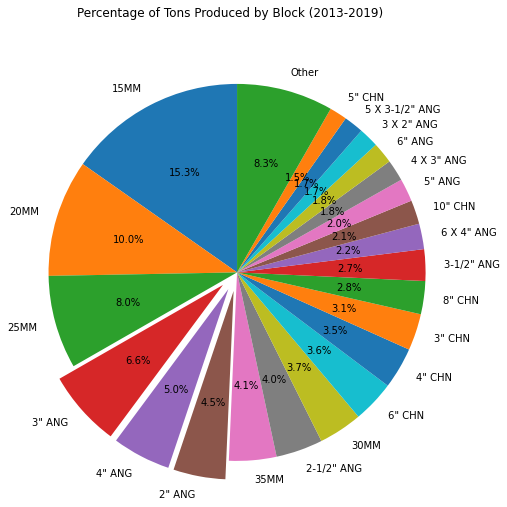

In [43]:
#PieChart by Block
fig_dims = (8,8)
fig, ax1 = plt.subplots(figsize=fig_dims)
fig.suptitle("Percentage of Tons Produced by Block (2013-2019)")
explode = [0 for block in range(23)]
explode[3:6] = [0.1, 0.1, 0.1] 

#Create plot & title
ax1.pie(total_blocks, labels=total_blocks.index, autopct='%1.1f%%', shadow=False, startangle=90, explode=explode)
ax1.axis('equal')

plt.show()

In [66]:
#Production Blocks by Week 2013-2019
weekly_prod = prod_reduced.resample("W", on="calendar_day").sum()
weekly_prod.groupby(weekly_prod.index.year).sum()
#put into bar chart

,ton
calendar_day,
2013,292617
2014,333238
2015,362437
2016,398913
2017,427463
2018,440790
2019,437522
2020,-102


Text(0, 0.5, 'Tons')

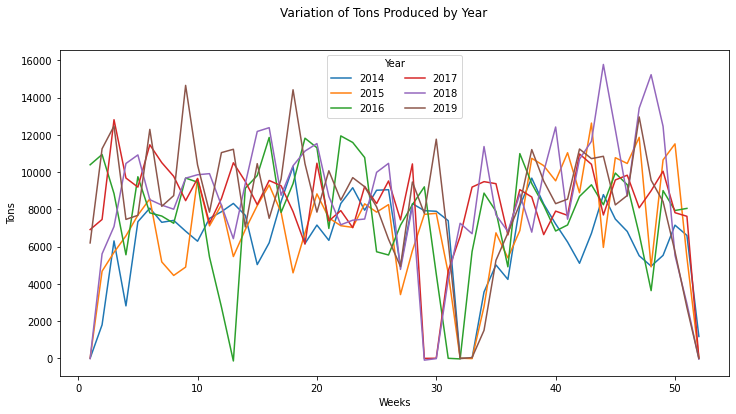

In [76]:
#create weekly plots by year
year_2013 = weekly_prod[weekly_prod.index.year == 2013]
year_2014 = weekly_prod[weekly_prod.index.year == 2014]
year_2015 = weekly_prod[weekly_prod.index.year == 2015]
year_2016 = weekly_prod[weekly_prod.index.year == 2016]
year_2017 = weekly_prod[weekly_prod.index.year == 2017]
year_2018 = weekly_prod[weekly_prod.index.year == 2018]
year_2019 = weekly_prod[weekly_prod.index.year == 2019]

#drop negative week1 values
year_2016 = year_2016[1:]
year_2017 = year_2017[1:]

#Create figure and plots
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle("Variation of Tons Produced by Year")


ax.plot(year_2014.index.week, year_2014["ton"], label=2014)
ax.plot(year_2015.index.week, year_2015["ton"], label=2015)
ax.plot(year_2016.index.week, year_2016["ton"], label=2016)
ax.plot(year_2017.index.week, year_2017["ton"], label=2017)
ax.plot(year_2018.index.week, year_2018["ton"], label=2018)
ax.plot(year_2019.index.week, year_2019["ton"], label=2019)
#Create legend & axis names
plt.legend(loc="best", title="Year", ncol=2)
ax.set_xlabel("Weeks")
ax.set_ylabel("Tons")

#Remove shutdowns?, ask about shutdowns, also what happened 2016 week 13
#try to normalize and come up with a range

In [17]:
#aggregate by year and block
prod_reduced.groupby(["calendar_day","block"]).sum()

ton
calendar_day block               
2013-02-04   15MM             118
             4" ANG            56
2013-02-05   15MM            1189
             4" ANG           522
2013-02-06   15MM            1198
...                           ...
2019-12-30   5 X 3-1/2" ANG    -5
             5" ANG            -9
             6 X 4" ANG        -6
             7" CHN            -5
             9" CHN            -5

[5622 rows x 1 columns]

In [12]:
# Aggregate Number of tons produced by Size
prod_reduced.groupby("size")["ton"].sum().sort_values(ascending=False)

size
15M             408496
20M             269050
25M             184577
35M             109430
30M              99698
                 ...  
130 X 130MM         -1
2 1/2X2X5/16        -1
8X8X3/4             -1
1/4 X 8             -2
1/4 X 5             -2
Name: ton, Length: 175, dtype: int64

In [13]:
# Aggregate Number of tons produced by SKU
prod_reduced.groupby("sku")["ton"].sum().sort_values(ascending=False)

sku
110001535    339802
110001860    186732
110001773    162121
110001621     71959
110001450     70786
              ...  
106020403        -9
106020373        -9
106020344       -16
110002040       -57
106021918       -69
Name: ton, Length: 1862, dtype: int64